In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline

In [5]:
import pandas as pd


def table_summary(data_frame: pd.DataFrame, only_missing_data=False):

    data_types = []
    for col in data_frame.columns:
        data_types.append(data_frame[col].dtypes)

    data_frame = data_frame.isnull()

    table = pd.DataFrame(
        columns=['Columns', 'Data_type', "Missing_data", "Available_data", "Total"])
    table = table.loc[:0]

    record = []
    missing_value = 0
    available = 0

    for i, column in enumerate(data_frame.columns.values.tolist()):
        type = data_types[i]
        for row in data_frame[column]:
            if row == True:
                missing_value += 1
            else:
                available += 1

        record.append(column)
        record.append(type)
        record.append(missing_value)
        record.append(available)
        record.append(missing_value + available)

        table.loc[len(table)] = record

        # reset
        missing_value = 0
        available = 0
        record = []
        type = ""

    if only_missing_data:
        return table[table['Missing_data'] > 0]
    else:
        return table


# Dataset

**Historical Wildfires**

This wildfire dataset contains data on fire activities in Australia starting from 2005. Additional information can be found [here](https://earthdata.nasa.gov/earth-observation-data/near-real-time/firms/c6-mcd14dl).

Variables

- Region: the 7 regions
- Date: in UTC and provide the data for 24 hours ahead
- Estimated_fire_area: daily sum of estimated fire area for presumed vegetation fires with a confidence > 75% for a each region in km2
- Mean_estimated_fire_brightness: daily mean (by flagged fire pixels(=count)) of estimated fire brightness for presumed vegetation fires with a confidence level > 75% in Kelvin
- Mean_estimated_fire_radiative_power: daily mean of estimated radiative power for presumed vegetation fires with a confidence level > 75% for a given region in megawatts
- Mean_confidence: daily mean of confidence for presumed vegetation fires with a confidence level > 75%
- Std_confidence: standard deviation of estimated fire radiative power in megawatts
- Var_confidence: Variance of estimated fire radiative power in megawatts
- Count: daily numbers of pixels for presumed vegetation fires with a confidence level of larger than 75% for a given region
- Replaced: Indicates with an Y whether the data has been replaced with standard quality data when they are available (usually with a 2-3 month lag). Replaced data has a slightly higher quality in terms of locations


### Importing data

In [2]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv"

df = pd.read_csv(URL)   

df.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


In [6]:
table_summary(df)

,Columns,Data_type,Missing_data,Available_data,Total
0,Region,object,0,26406,26406
1,Date,object,0,26406,26406
2,Estimated_fire_area,float64,0,26406,26406
3,Mean_estimated_fire_brightness,float64,0,26406,26406
4,Mean_estimated_fire_radiative_power,float64,0,26406,26406
5,Mean_confidence,float64,0,26406,26406
6,Std_confidence,float64,2207,24199,26406
7,Var_confidence,float64,2207,24199,26406
8,Count,int64,0,26406,26406
9,Replaced,object,0,26406,26406


#### Convert to date types

In [7]:
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month

table_summary(df)

,Columns,Data_type,Missing_data,Available_data,Total
0,Region,object,0,26406,26406
1,Date,object,0,26406,26406
2,Estimated_fire_area,float64,0,26406,26406
3,Mean_estimated_fire_brightness,float64,0,26406,26406
4,Mean_estimated_fire_radiative_power,float64,0,26406,26406
5,Mean_confidence,float64,0,26406,26406
6,Std_confidence,float64,2207,24199,26406
7,Var_confidence,float64,2207,24199,26406
8,Count,int64,0,26406,26406
9,Replaced,object,0,26406,26406


In [14]:
df['Date'] = pd.to_datetime(df['Date'])

In [15]:
df.dtypes

Region                                         object
Date                                   datetime64[ns]
Estimated_fire_area                           float64
Mean_estimated_fire_brightness                float64
Mean_estimated_fire_radiative_power           float64
Mean_confidence                               float64
Std_confidence                                float64
Var_confidence                                float64
Count                                           int64
Replaced                                       object
Year                                            int32
Month                                           int32
dtype: object

## Practice Tasks

### TASK 1.1: Let's try to understand the change in average estimated fire area over time <br>(use pandas to plot)

Text(0.5, 1.0, 'Estimated Fire Area over Time')

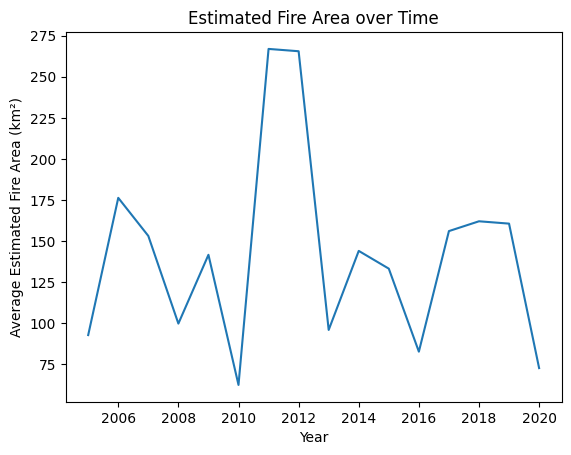

In [48]:
df_avgEstFireArea = df.groupby(['Year'])['Estimated_fire_area'].mean()

df_avgEstFireArea.plot(x=df_avgEstFireArea.index, y=df_avgEstFireArea.values)
plt.xlabel('Year')
plt.ylabel('Average Estimated Fire Area (km²)')
plt.title('Estimated Fire Area over Time')

### TASK 1.2: You can notice the peak in the plot between 2010 to 2013. Let's narrow down our finding, by plotting the estimated fire area for year grouped together with month.

Text(0.5, 1.0, 'Estimated Fire Area over Time')

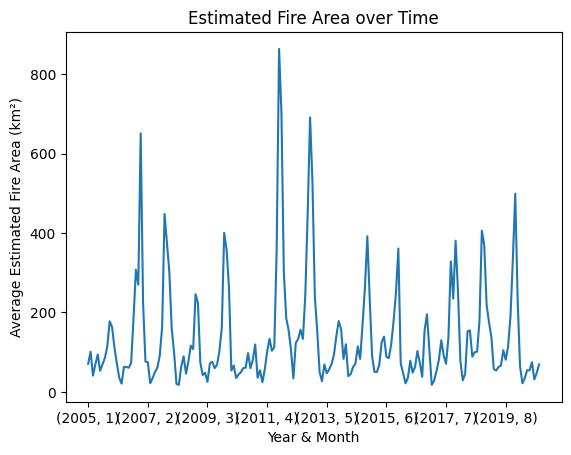

In [50]:
df_plot = df.groupby(['Year', 'Month'])['Estimated_fire_area'].mean()

df_plot.plot(x=df_plot.index, y=df_plot.values)
plt.xlabel('Year & Month')
plt.ylabel('Average Estimated Fire Area (km²)')
plt.title('Estimated Fire Area over Time')

This plot represents that the estimated fire area was on its peak after 2011, April and before 2012. You can verify on google/news, this was the time of maximum wildfire hit in Austrailia


### TASK 1.3: Let's have an insight on the distribution of mean estimated fire brightness across the regions<br> use the functionality of seaborn to develop a barplot

Text(0.5, 1.0, 'Distribution of Mean Estimated Fire Brightness across Regions')

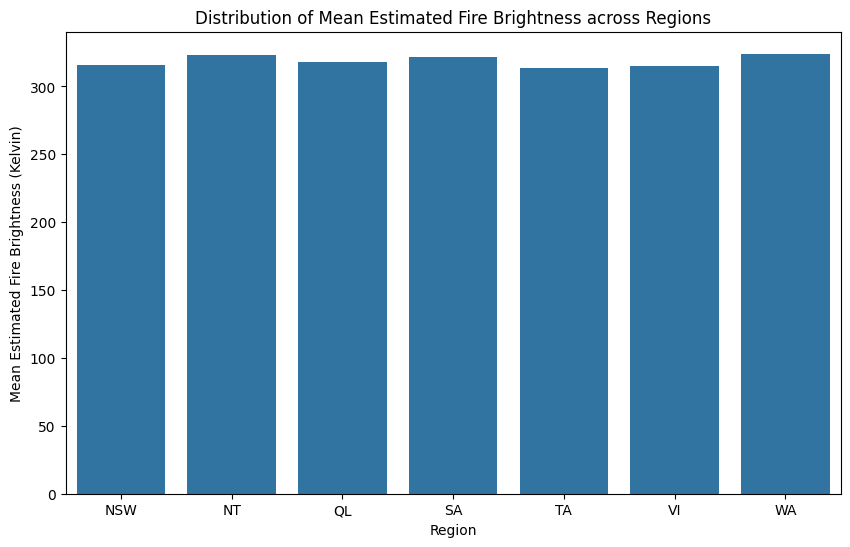

In [70]:
df_plot = df.groupby('Region')['Mean_estimated_fire_brightness'].mean().to_frame().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(df_plot, x='Region', y='Mean_estimated_fire_brightness')

plt.xlabel('Region')
plt.ylabel('Mean Estimated Fire Brightness (Kelvin)')
plt.title('Distribution of Mean Estimated Fire Brightness across Regions')

### TASK 1.4: Let's find the portion of count of pixels for presumed vegetation fires vary across regions<br> we will develop a pie chart for this

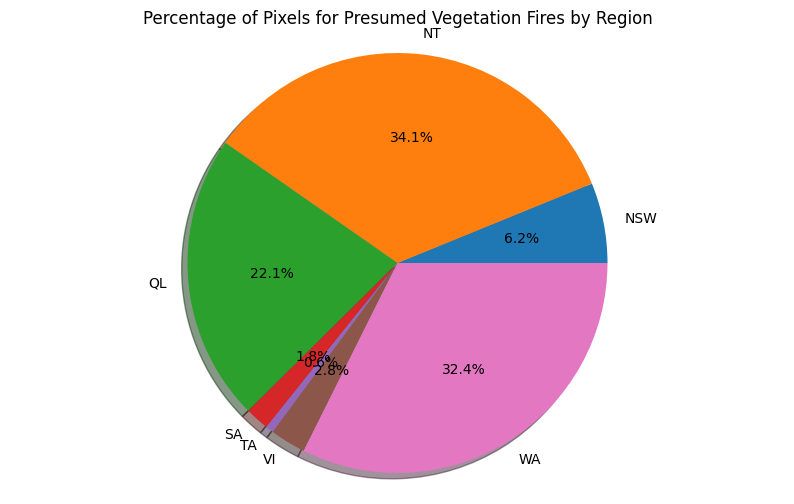

,Region,Count
0,NSW,117412
1,NT,649430
2,QL,420882
3,SA,35160
4,TA,11473
5,VI,52473
6,WA,615968


In [85]:
df_pie = df.groupby('Region')['Count'].sum().reset_index()
plt.figure(figsize=(10, 6))

plt.pie(df_pie['Count'], labels=df_pie['Region'], autopct='%1.1f%%', shadow=True)
plt.title('Percentage of Pixels for Presumed Vegetation Fires by Region')
plt.axis('equal')
plt.show()
df_pie

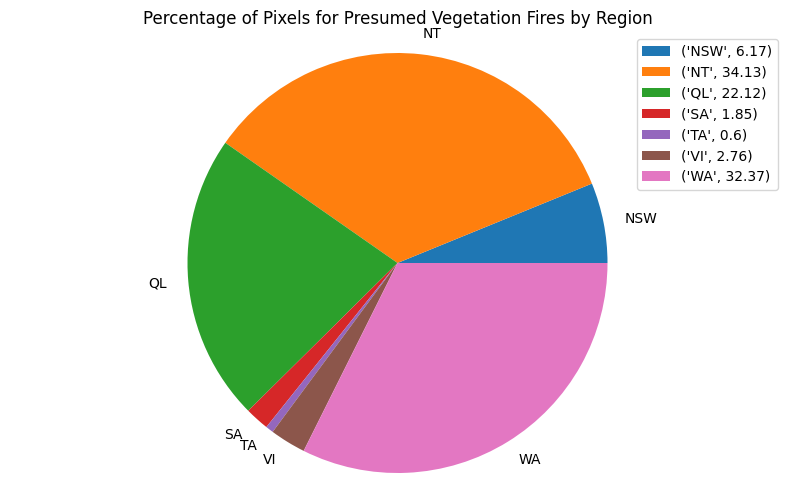

In [103]:
region_counts = df.groupby('Region')['Count'].sum()
plt.figure(figsize=(10, 6))

plt.pie(region_counts, labels=region_counts.index)
plt.title('Percentage of Pixels for Presumed Vegetation Fires by Region')
plt.legend([(i,round(k/region_counts.sum()*100,2)) for i,k in zip(region_counts.index, region_counts)])
plt.axis('equal')
plt.show()

### TASK 1.6: Let's try to develop a histogram of the mean estimated fire brightness<br> Using Matplotlib to create the histogram

Text(0.5, 1.0, 'Histogram of Mean Estimated Fire Brightness')

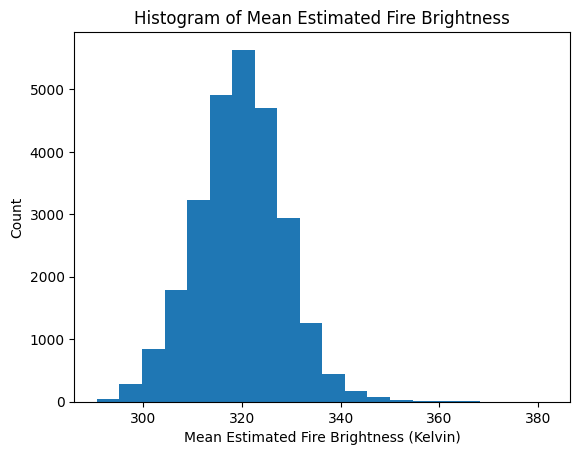

In [106]:
df['Mean_estimated_fire_brightness'].plot.hist(bins=20)

plt.xlabel("Mean Estimated Fire Brightness (Kelvin)")
plt.ylabel("Count")
plt.title("Histogram of Mean Estimated Fire Brightness")

### TASK 1.7: What if we need to understand the distribution of estimated fire brightness across regions? Let's use the functionality of seaborn and  pass region as hue


Text(0.5, 1.0, 'Histogram of Mean Estimated Fire Brightness')

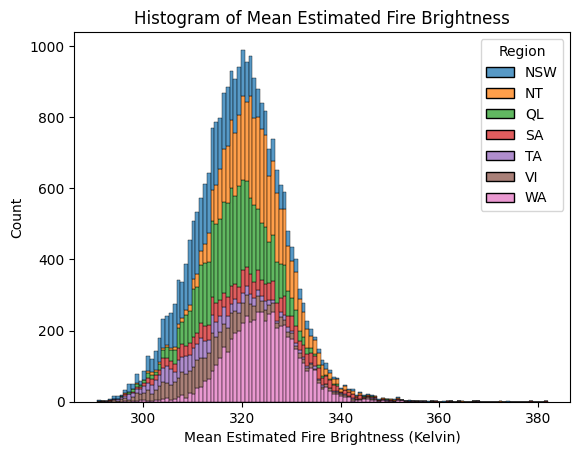

In [118]:
sns.histplot(df, x='Mean_estimated_fire_brightness', hue='Region', multiple='stack')

plt.xlabel("Mean Estimated Fire Brightness (Kelvin)")
plt.ylabel("Count")
plt.title("Histogram of Mean Estimated Fire Brightness")

### TASK 1.8: Let's try to find if there is any correlation between mean estimated fire radiative power and mean confidence level?

<Axes: xlabel='Mean_confidence', ylabel='Mean_estimated_fire_radiative_power'>

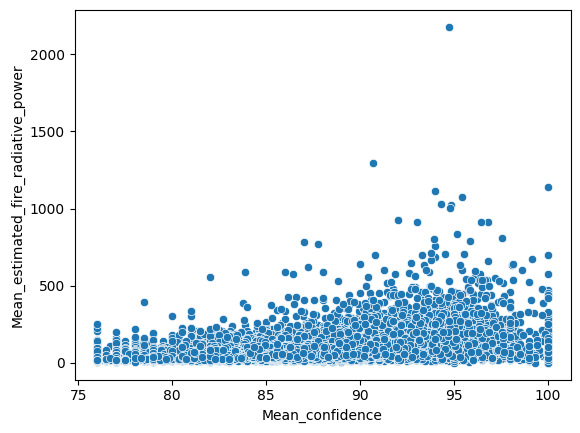

In [126]:
sns.scatterplot(df, y='Mean_estimated_fire_radiative_power', x='Mean_confidence')


### TASK 1.9: Let's mark these seven regions on the Map of Australia using Folium
<br> we have created a dataframe for you containing the regions, their latitudes and longitudes. <br> For australia use [-25, 135] as location to create the map


In [127]:
region_data = {'region':['NSW','QL','SA','TA','VI','WA','NT'], 'Lat':[-31.8759835,-22.1646782,-30.5343665,-42.035067,-36.5986096,-25.2303005,-19.491411], 
               'Lon':[147.2869493,144.5844903,135.6301212,146.6366887,144.6780052,121.0187246,132.550964]}

reg=pd.DataFrame(region_data)
reg

,region,Lat,Lon
0,NSW,-31.875984,147.286949
1,QL,-22.164678,144.584490
2,SA,-30.534367,135.630121
3,TA,-42.035067,146.636689
4,VI,-36.598610,144.678005
5,WA,-25.230300,121.018725
6,NT,-19.491411,132.550964


In [128]:
aus_reg = folium.map.FeatureGroup()

# Create a Folium map centered on Australia
Aus_map = folium.Map(location=[-25, 135], zoom_start=4)

# loop through the region and add to feature group
for lat, lng, lab in zip(reg.Lat, reg.Lon, reg.region):
    aus_reg.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            popup=lab,
            radius=5, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
Aus_map.add_child(aus_reg)